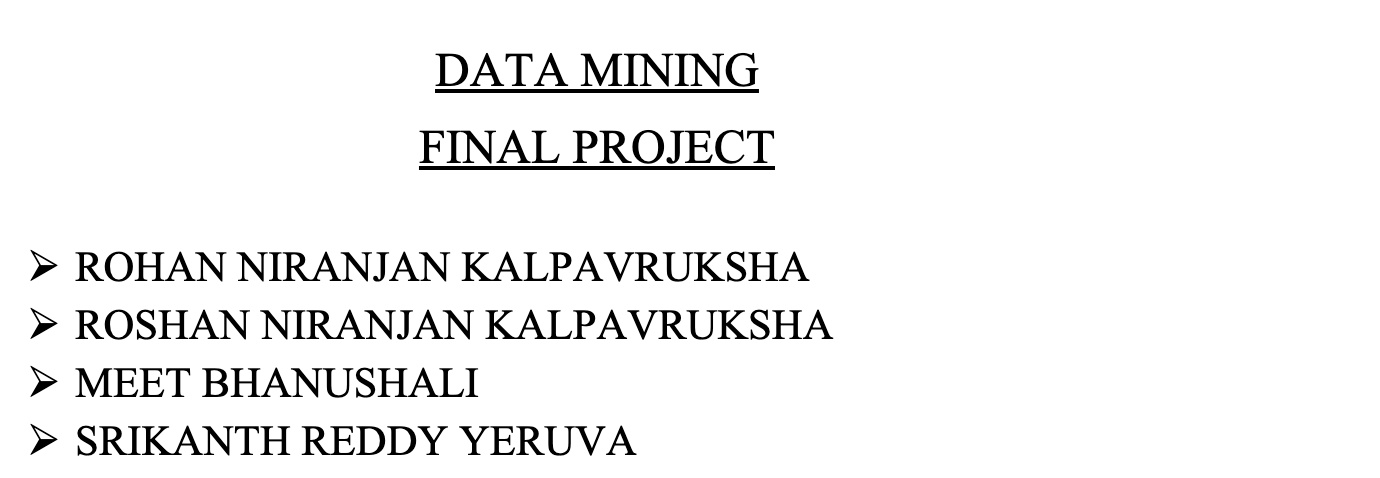

# IMPORTING LIBRARIES

In [1]:
# Installing the necessary libraries
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# LOAD THE DATASET

In [3]:
# load the data from csv file locally in our PC
data = pd.read_csv('heart_disease_uci.csv')
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Columns Description:

1. id: (Unique id for each patient)
2. age: (Age of the patient in years)
3. origin: (place of study)
4. sex: (Male/Female)
5. cp: chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps: resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol: (serum cholesterol in mg/dl)
8. fbs: (if fasting blood sugar > 120 mg/dl)
9. restecg: (resting electrocardiographic results)
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: the predicted attribute

# Exploratory Data Analysis (EDA)

In [4]:
# Explore each column of the dataset
data.info()
# Checking data shape
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


(920, 16)

### Finding - 'All the columns have correct data format'

In [5]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


# PRE-PROCESSING - CLEANING DATA

### Checking for duplicate rows

In [6]:
data.duplicated().sum()

0

### Checking for missing values

In [7]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

## EXPLORING EACH COLUMN

## 1. 'ID' Column
### Id column does not gain any information about data so removed this column from dataset

In [8]:
data.drop(['id'],axis=1,inplace=True)

## 2. 'Age' Column

In [9]:
# let's summarie the age column
data['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64



1.   ### The **minimum age** to have a heart disease starts from **28** years old and **maximum** **77** year old.
2.   ### The **average** age in the people to have a heart disease is approximately **53**.

## 3. 'Sex' Column

In [10]:
# find the values of sex column
data['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64



1.   ### Percentage of **males** in the data is: **78.91%**
2.   ### Percentage of **females** in the data is: **21.09%**



## 4. 'Dataset' Column

In [11]:
data['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [12]:
# print the values count of dataset column grouped by sex
print(data.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


### 1. The data from **Cleveland , Hungary ,Switzerland,and VA Long Beach**
### 2. There **highest** number of people from **Cleveland** (304) and **lowest** from **Switzerland** (123)
### 3. The **highest** number of **females** in this dataset are from **Cleveland** (97) and **lowest** from VA **Long Beach** (6)
### 4. The **highest** number of **males** in this dataset are from **Hungary** (212) and **lowest** from **Switzerland** (113).

## 5. 'Chest Pain' Column

In [13]:
# value count of cp column
data['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

### 1. There are **46** people who have **Typical Angina pain**.

### 2.  There are **496** people who have **asymptomatic pain**.

### 3. There are **204** people who have **non-anginal pain**.

### 4. There are **174** people who have **atypical Angina pain**.

## 6. 'Resting blood pressure' Column

In [14]:
# find the value counts of trestbps column
data['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

### The **minimum** resting blood pressure is **94** and **maximum** is **200**
### The **average** resting blood pressure is **132.4**

In [15]:
# Dealing with missing values in 'trestbps' column

# Replacing empty 'trestbps' with mean
average_trestbps = data["trestbps"].astype("float").mean()
data["trestbps"].replace(np.nan, average_trestbps, inplace = True)

## 7. 'Cholestrol' Column

In [16]:
print(data['chol'].describe())

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64


### The **average** of Cholestrol is **199.130337%**

### **Minimum** Cholestrol is **0**

### **Maximum** Cholestrol is **603**

In [17]:
# Dealing with missing values in 'chol' column

# Replacing empty 'chol' with mean
average_chol = data["chol"].astype("float").mean()
data["chol"].replace(np.nan, average_chol, inplace = True)

## 8. 'Fasting blood sugar' Column

In [18]:
data['fbs'].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

In [19]:
print(data.groupby('sex')['fbs'].value_counts())

sex     fbs  
Female  False    164
        True      19
Male    False    528
        True     119
Name: count, dtype: int64


### There **True** values are **138** and **False** values **692**
### There **164** **Females** have **False** values means no Fasting blood sugar and **19 Females** have **True** value have Fasting Blood sugar
### There **528 Males** have **False values** means no Fasting Blood Sugar and **119 Males** have **True value** have Fasting Blood Sugar

In [20]:
# Dealing with missing values in 'fbs' column

# Replacing null values in fbs with most frequent fbs
fbs = data["fbs"].value_counts().idxmax()
data["fbs"].replace(np.nan, fbs, inplace=True)

## 9. 'Resting electrocardiographic results' Column

In [21]:
restecg_counts = data['restecg'].value_counts()
print(restecg_counts)

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


### Found,
### 551 **normal**
### 188 **lv hypertrophy**
### 179 **st-t abnormality**

In [22]:
# Removing rows where are found Nan values
data.dropna(subset=['restecg'], inplace=True)

## 10. 'Maximum heart rate achieved' Column

In [23]:
data['thalch'].describe()

count    863.000000
mean     137.528389
std       25.950226
min       60.000000
25%      120.000000
50%      140.000000
75%      157.000000
max      202.000000
Name: thalch, dtype: float64

### **Minimum** heart rate is **60** in 51 age
### **Maximum** heart rate is **202** in 29 age
### **Average** of heart rate is **137.528389**%

In [24]:
# Dealing with missing values in 'thalch' column

# Replacing empty 'thalch' with mean
average_thalch = data["thalch"].astype("float").mean()
data["thalch"].replace(np.nan, average_thalch, inplace = True)

## 11. 'Exercise-induced angina' Column

In [25]:
data['exang'].value_counts()

exang
False    526
True     337
Name: count, dtype: int64

In [26]:
print(data.groupby('dataset')['exang'].value_counts())

dataset        exang
Cleveland      False    205
               True      99
Hungary        False    202
               True      89
Switzerland    False     67
               True      54
VA Long Beach  True      95
               False     52
Name: count, dtype: int64


### There **True** values are **337** and **False** values **526**
### In **Cleveland** false values are 205 and true values are 99
### In **Hungry** false values are 202 and true values are 89
### In **Switzerland** false values are 67 and true values are 54
### In **VA Long Beach** false valuesare 52 and true values are 95

In [27]:
# Dealing with missing values in 'exang' column

# Replacing null values in exang with most frequent exang
exang = data["exang"].value_counts().idxmax()
data["exang"].replace(np.nan, exang, inplace=True)

## 12. 'Oldpeak' Column

In [28]:
print(data['oldpeak'].describe())

count    856.000000
mean       0.880607
std        1.091840
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64


### Oldpeak values cannnot be negative, hence converting negative to positive values

In [29]:
# Convert negative values to positive
data['oldpeak'] = data['oldpeak'].abs()

print(data['oldpeak'].describe())

count    856.000000
mean       0.910280
std        1.067198
min        0.000000
25%        0.000000
50%        0.550000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64


### The **minimum** value of oldpeak is **0** **mostly values are zero**
### Maximum value is **6.2**

In [30]:
# Dealing with missing values in 'oldpeak' column

# Replacing empty 'oldpeak' with mean
average_oldpeak = data["oldpeak"].astype("float").mean()
data["oldpeak"].replace(np.nan, average_oldpeak, inplace = True)

## 13. 'Slope' Column

In [31]:
# value count of slope
data['slope'].value_counts()

slope
flat           345
upsloping      202
downsloping     63
Name: count, dtype: int64

In [32]:
print(data.groupby('sex')['slope'].value_counts())

sex     slope      
Female  flat            69
        upsloping       57
        downsloping      7
Male    flat           276
        upsloping      145
        downsloping     56
Name: count, dtype: int64


### **Downsloping** count in Male is **56** is more and in Female is **7**
### **Flat** count in Male is **276** is more and in Female is **69**
### **Upsloping** count in Male is **145** is more and in Female is **57**

In [33]:
# Dealing with missing values in 'slope' column

# Replacing null values in slope with most frequent slope
slope = data["slope"].value_counts().idxmax()
data["slope"].replace(np.nan, slope, inplace=True)

## 14. 'Number of major vessels (0-3) colored by fluoroscopy' Column

In [34]:
# value count of slope
data['ca'].value_counts()

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

### **Minimum** value is **0.0**

### **Maximum** value is **3.0**

### The **average** is **0.676375%**

In [35]:
# Dealing with missing values in 'ca' column

# Replacing null values in ca with most frequent slope
ca = data["ca"].value_counts().idxmax()
data["ca"].replace(np.nan, ca, inplace=True)

## 15. 'Thal - Kind of Defect ' Column

In [36]:
data['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [37]:
print(data.groupby('thal')['dataset'].value_counts())

thal               dataset      
fixed defect       Cleveland         18
                   Hungary           10
                   Switzerland       10
                   VA Long Beach      8
normal             Cleveland        166
                   Switzerland       19
                   Hungary            7
                   VA Long Beach      4
reversable defect  Cleveland        117
                   Switzerland       42
                   VA Long Beach     22
                   Hungary           11
Name: count, dtype: int64


### The **most** **Fixed Defect** values are in **Cleveland** (18) and l**east Fixed Defect** values are in **VA Long Beach** (8)
### The **most Normal values** are in **Cleveland** (166) and **least Normal values** are in **VA Long Beach** (4)
### The **most Reversable Defect** values are in **Hungary** (117) and **least Reversable Defect** values are in **Cleveland**(11)

In [38]:
# Dealing with missing values in 'thal' column

# Replacing null values in thal with most frequent thal
thal = data["thal"].value_counts().idxmax()
data["thal"].replace(np.nan, thal, inplace=True)

## 16. 'The predicted attribute of heart disease' Column

In [39]:
# check value count
print(data['num'].value_counts())

num
0    411
1    263
2    109
3    107
4     28
Name: count, dtype: int64


0 = no heart disease

1 = mild heart disease

2 = moderate heart disease

3 = severe heart disease

4 = critical heart disease

In [40]:
#Convert the target variable into binary classification problem -- 0(no heart disease) and 1(heart disease)
data['num'] = data['num'].replace([1, 2, 3, 4], 1)
print(data['num'].value_counts())

num
1    507
0    411
Name: count, dtype: int64


In [41]:
#check whether there are any null values after handling missing data
data.isnull().sum().sum()

0

# PREVALANCE ANALYSIS

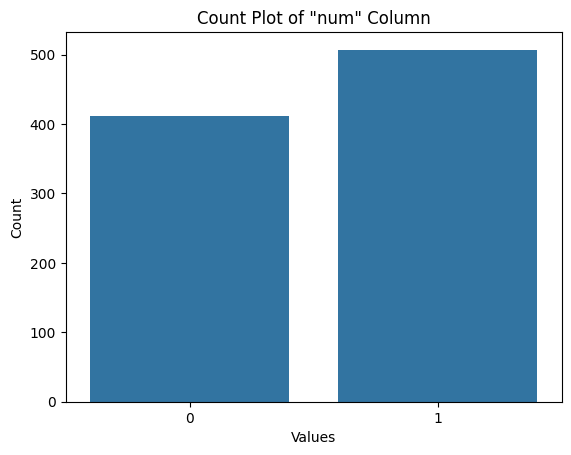

In [42]:
sns.countplot(x='num', data=data)
plt.title('Count Plot of "num" Column')
plt.xlabel('Values')
plt.ylabel('Count')
plt.show()

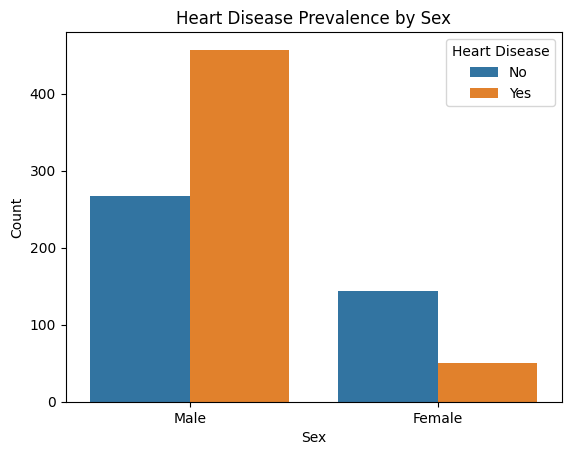

In [43]:
sns.countplot(data=data, x='sex', hue='num')
plt.title('Heart Disease Prevalence by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

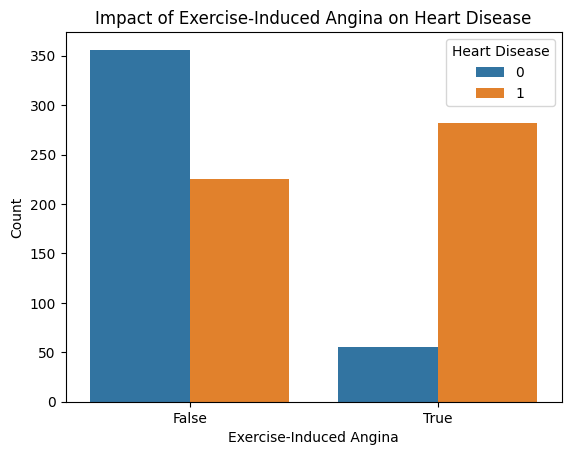

In [44]:
sns.countplot(data=data, x='exang', hue='num')
plt.title('Impact of Exercise-Induced Angina on Heart Disease')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['0', '1'])
plt.show()

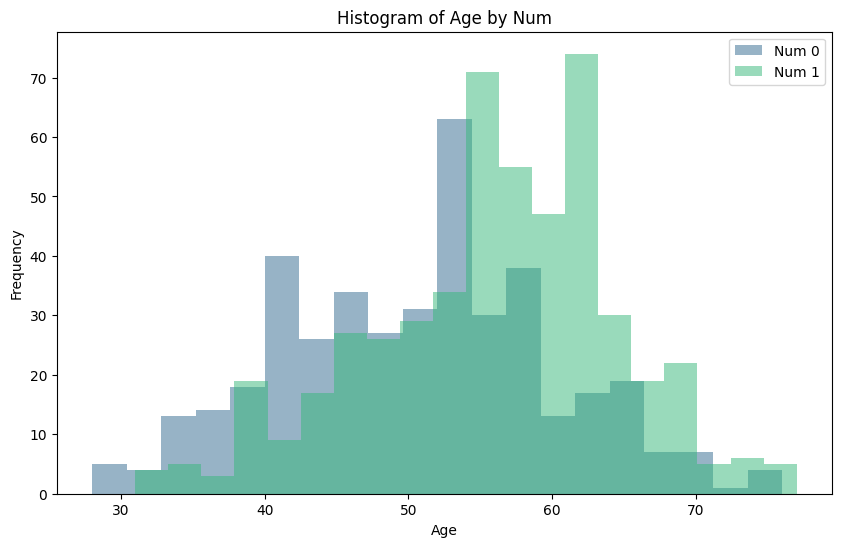

In [45]:
unique_nums = data['num'].unique()

# Define a color palette for each category of 'num'
colors = sns.color_palette('viridis', n_colors=len(unique_nums))

# Plot separate histograms for each category of 'num' with different colors
plt.figure(figsize=(10, 6))
for i, num in enumerate(unique_nums):
    plt.hist(data[data['num'] == num]['age'], bins=20, alpha=0.5, label=f'Num {num}', color=colors[i])

plt.title('Histogram of Age by Num')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

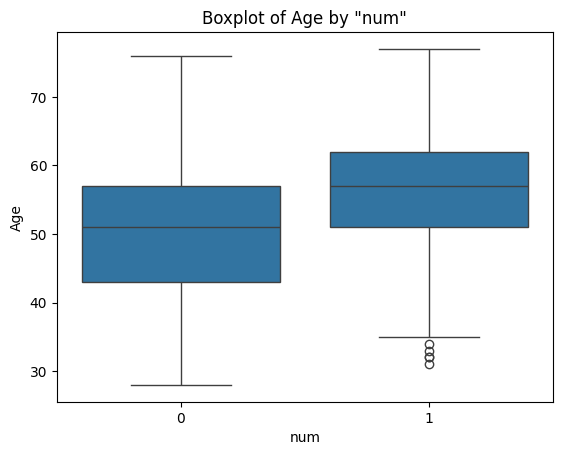

In [46]:
# Boxplot of 'age' by 'num'
sns.boxplot(x='num', y='age', data=data)
plt.title('Boxplot of Age by "num"')
plt.xlabel('num')
plt.ylabel('Age')
plt.show()

## Correlation between features

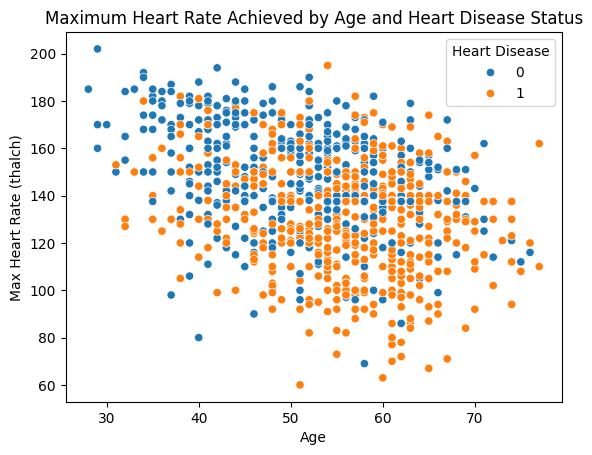

In [47]:
sns.scatterplot(data=data, x='age', y='thalch', hue='num')
plt.title('Maximum Heart Rate Achieved by Age and Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalch)')
plt.legend(title='Heart Disease')
plt.show()

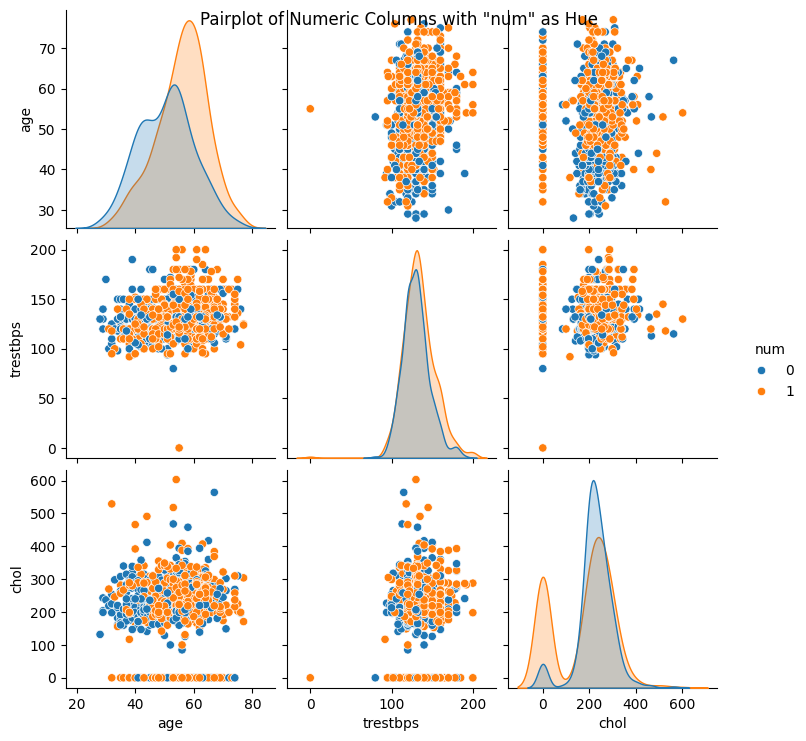

In [48]:
# Pairplot to visualize relationships between numeric columns
sns.pairplot(data=data, vars=['age', 'trestbps', 'chol'], hue='num')
plt.suptitle('Pairplot of Numeric Columns with "num" as Hue')
plt.show()

## Encoding all categorical columns by LabelEncoder

In [49]:
from sklearn.preprocessing import LabelEncoder
# List of categorical column names
categorical_columns = ['sex', 'dataset', 'cp',
                       'fbs', 'restecg', 'exang', 'slope', 'thal']
label_encoder = LabelEncoder()

for col in categorical_columns:
      # Fit label encoder and transform values on the column
      data[col] = label_encoder.fit_transform(data[col])

In [50]:
data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


# Split the data set into Input(X) and Output(Y)


In [51]:
# Split the data set into X and Y and assign top  features based on correlation to X and num to y

target_variable = 'num'

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Get the absolute correlation values with the target variable
correlation_with_target = correlation_matrix[target_variable].abs().sort_values(ascending=False)

# Select top features based on correlation
top_features_corr = correlation_with_target[1:7].index.tolist()  # Exclude target variable


# Create X DataFrame with top features
X = data[top_features_corr]

# Extract target variable y
y = data[target_variable]

In [52]:
# Feature scaling for the X (features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test data

In [53]:
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((642, 6), (276, 6), (642,), (276,))

# Implementing classifiers

# Training classifiers

In [55]:
# # Implementing classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=2) # K=2 because we have 2 categories to classify (Heart Disease, No Heart Disease)
# kmeans_classifier = KMeans(n_clusters=5)  # Assuming k=5 clusters
dt_classifier = DecisionTreeClassifier()
svm_classifier = SVC(kernel='linear')
logreg_clf = LogisticRegression(random_state=42)
adaboost_clf = AdaBoostClassifier(random_state=42)
# Training the classifiers
knn_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
logreg_clf.fit(X_train, y_train)
adaboost_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

# Evaluating classifiers

In [56]:
accuracy_scores=[]

# Evaluating the performance of classifiers
def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print(report)
    print("Confusion Matrix:")

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

Classifier 1 (KNN)
Accuracy: 0.7355072463768116
Precision: 0.765722461790033
Recall: 0.7355072463768116
F1-Score: 0.7356426611111905
              precision    recall  f1-score   support

           0       0.64      0.86      0.73       118
           1       0.86      0.65      0.74       158

    accuracy                           0.74       276
   macro avg       0.75      0.75      0.74       276
weighted avg       0.77      0.74      0.74       276

Confusion Matrix:


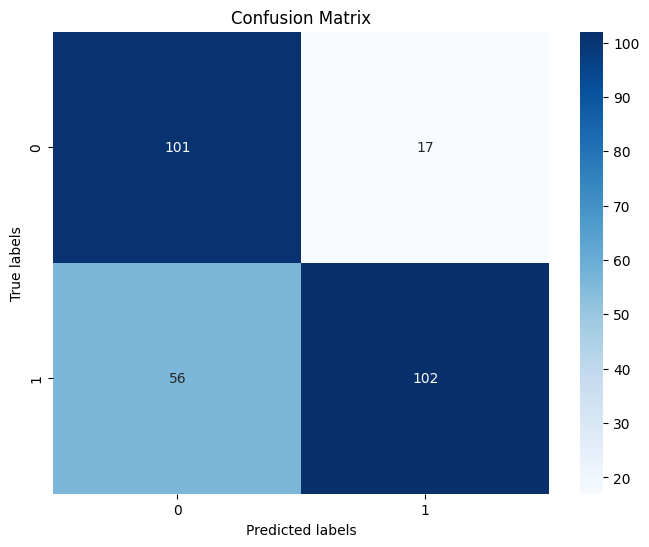

In [57]:
print("Classifier 1 (KNN)")
evaluate_classifier(knn_classifier, X_test, y_test)

Classifier 2 (Decision Tree)
Accuracy: 0.7427536231884058
Precision: 0.7444430582413241
Recall: 0.7427536231884058
F1-Score: 0.7433542571484868
              precision    recall  f1-score   support

           0       0.69      0.72      0.71       118
           1       0.78      0.76      0.77       158

    accuracy                           0.74       276
   macro avg       0.74      0.74      0.74       276
weighted avg       0.74      0.74      0.74       276

Confusion Matrix:


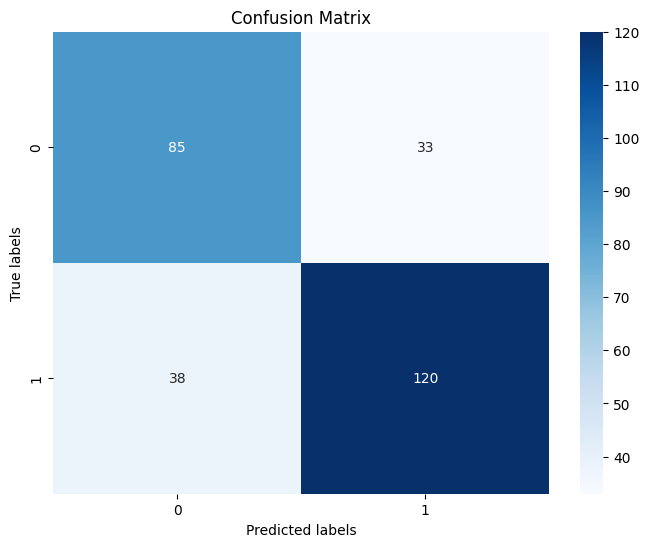

In [58]:
print("Classifier 2 (Decision Tree)")
evaluate_classifier(dt_classifier, X_test, y_test)

Classifier 3 (Support Vector Machine)
Accuracy: 0.8079710144927537
Precision: 0.8146434038882551
Recall: 0.8079710144927537
F1-Score: 0.8089241570000033
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       118
           1       0.87      0.78      0.82       158

    accuracy                           0.81       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.81      0.81      0.81       276

Confusion Matrix:


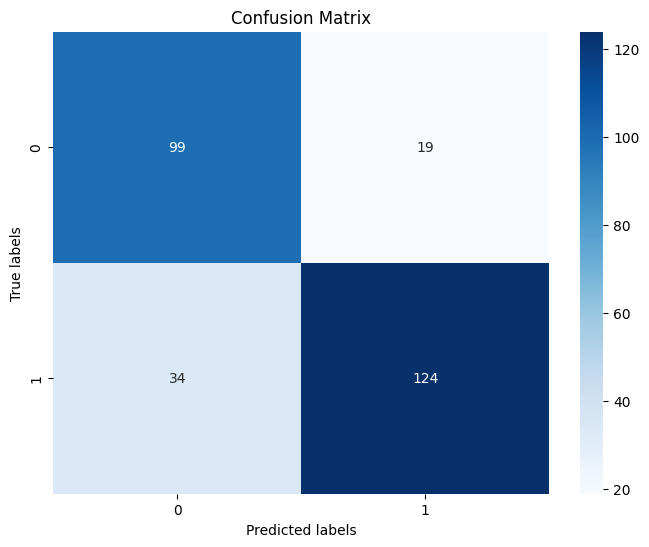

In [59]:
print("Classifier 3 (Support Vector Machine)")
evaluate_classifier(svm_classifier, X_test, y_test)

Classifier  4 (Logistic Regression)
Accuracy: 0.8079710144927537
Precision: 0.8101948363566561
Recall: 0.8079710144927537
F1-Score: 0.8085617784818886
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       118
           1       0.85      0.81      0.83       158

    accuracy                           0.81       276
   macro avg       0.80      0.81      0.81       276
weighted avg       0.81      0.81      0.81       276

Confusion Matrix:


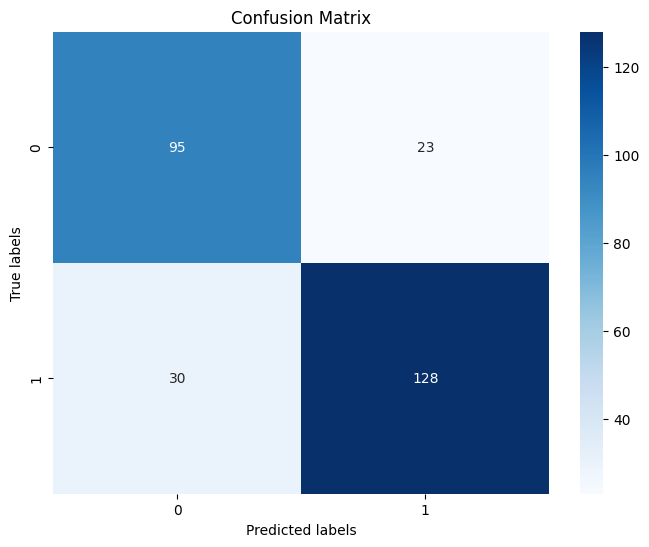

In [60]:
print("Classifier  4 (Logistic Regression)")
evaluate_classifier(logreg_clf, X_test, y_test)
print()

Classifier 5  (Adaboost Regression)
Accuracy: 0.8007246376811594
Precision: 0.802983395719359
Recall: 0.8007246376811594
F1-Score: 0.8013376946510165
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       118
           1       0.84      0.80      0.82       158

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276

Confusion Matrix:


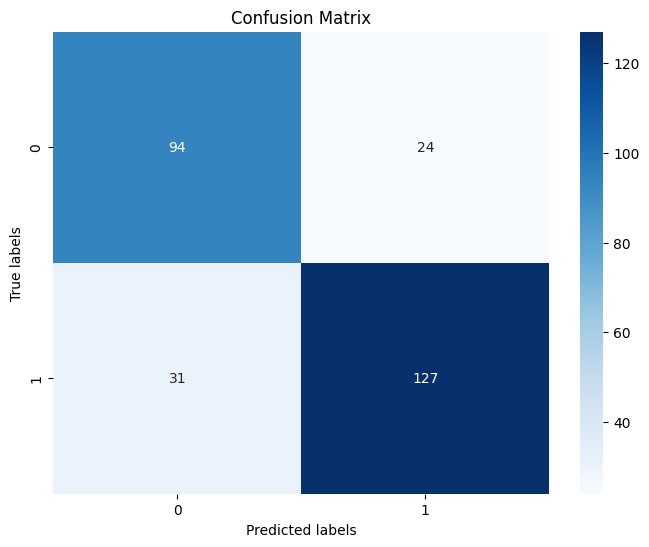

In [61]:
print("Classifier 5  (Adaboost Regression)")
evaluate_classifier(adaboost_clf, X_test, y_test)

In [62]:
 # Accuracy Scores of various calssifiers
 accuracy_scores

[0.7355072463768116,
 0.7427536231884058,
 0.8079710144927537,
 0.8079710144927537,
 0.8007246376811594]

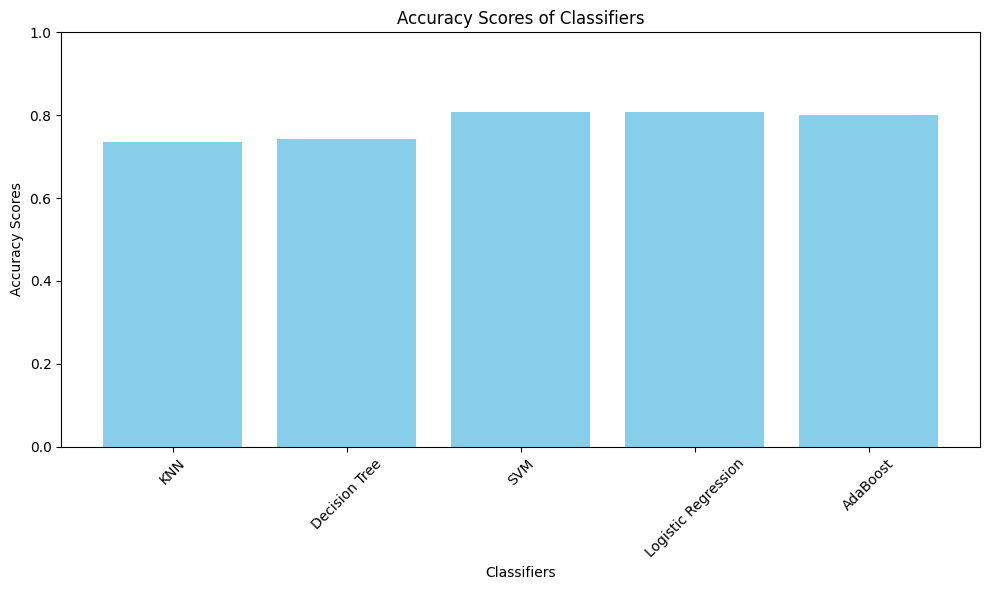

In [63]:
# Graph based comparitive study of accuracy scores of classifiers
classifiers = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression', 'AdaBoost']

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracy_scores, color='skyblue')

# Add labels and title
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores of Classifiers')
plt.ylim(0, 1)  # Adjust the y-axis limit if needed

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# ROC Curve

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


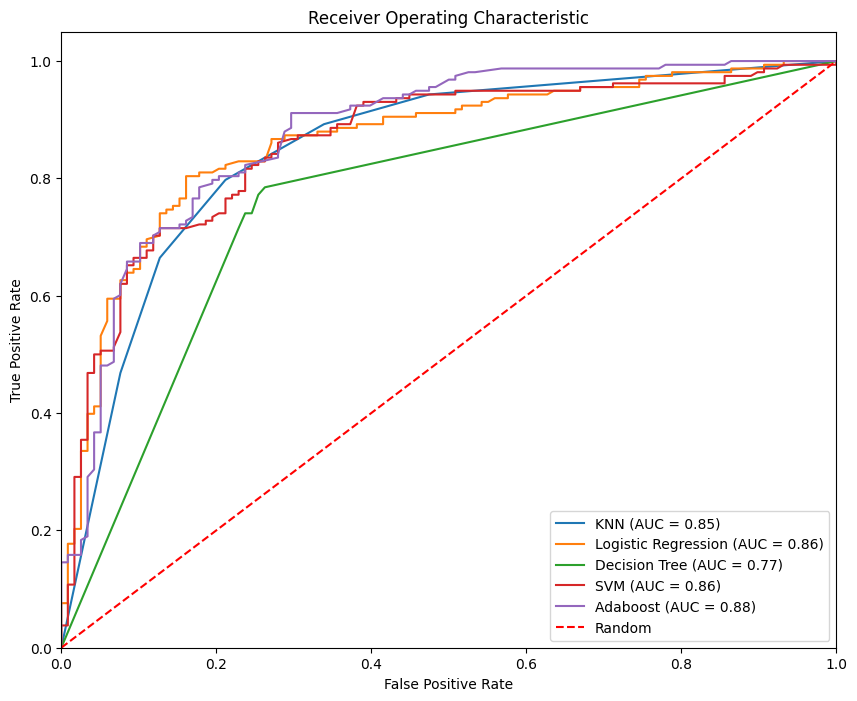

In [64]:
# ROC Curve for all classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Adaboost": AdaBoostClassifier()
}

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## **Conclusion** - After evaluating multiple classifier algorithms including KNN, Logistic Regression, Decision Tree, SVM, and Adaboost, we found that **Adaboost consistently outperformed the other algorithms** in terms of Area Under the ROC Curve (AUC). This indicates that Adaboost was most effective in discriminating between the positive and negative classes in our dataset. Therefore, based on our evaluation, we conclude that Adaboost works best for our project.